![26_weeks_of_data_science_banner](../images/26-weeks-of-data-science-banner.jpg)

# Exploratory Data Analysis
![EDA_open](../images/eda_open.jpg)

# Program so far 
***
* Python Data Science Tool box
* Introduction to machine learning
* Summarizing the Data
* Art of Statistical Inference
* Linear Regression

# What are we going to learn today?
***
- Initial Exploration
    - Load data
    - Identify null values and properties of our data
    - How to find the numerical and categorical features of our data
- Introduction to Seaborn
    - What is seaborn? (1/2)
    - What is seaborn? (2/2)
- Univariate Analysis
    - How is univariate analysis useful?
    - Numerical Features in Univariate Analysis
        - Histogram
        - Kernel Density Estimation
        - Boxplots
        - More about Boxplots (1/2)
        - More about Boxplots (2/2)
    - Categorical Features in Univariate Analysis
         - Countplots
- Multivariate Analysis
     - Numerical vs Numerical Features
     - Numerical vs Categorical Features
     - Categorical vs Categorical Features

# Initial Exploration
***
- Now, that we have tested all the factors affecting the price of a house using inferential statistics, we want to get a better understanding of the dataset.
- After a bit of research we realised that we will have to operate different rows and columns to get a bigger picture.
- Our exploration continues....

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

<div class="alert alert-block alert-success">**We start with reading the data.**</div>

In [34]:
dataframe = pd.read_csv('../data/clean_train.csv',index_col=0)

It’s always a good idea to take a closer look at the data itself. 

With the help of the `head()` and `tail()` functions of the Pandas library, we can easily check out the first few and last few lines of the DataFrame, respectively.

In [35]:
dataframe.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [5]:
dataframe.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,SC60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,SC20,RL,75.0,9937,Pave,None,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


It is also a good practice to know the columns and their corresponding data types, along with finding whether they contain null values or not. 

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 n

The `describe()` function helps us to get various summary statistics that exclude NaN values.

This function returns the **count, mean, standard deviation, minimum and maximum** values and the quantiles of the data.

In [7]:
dataframe.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


We can find the total number of rows and columns in the dataset using the Syntax below:-

In [8]:
dataframe.shape

(1460, 80)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How to find the Numerical Features of our Dataset?
***
Now, let's see how to find out and list the number of Numerical Features in our dataset.

In [37]:
numerical_feature_columns = list(dataframe._get_numeric_data().columns)
numerical_feature_columns

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## How to find the Categorical Features in our Dataset?
***
As in the case of Numerical Features, let's find out the number of Categorical Features in our dataset.

In [10]:
categorical_feature_columns = list(set(dataframe.columns) - set(dataframe._get_numeric_data().columns))
categorical_feature_columns

['MSSubClass',
 'GarageFinish',
 'BsmtFinType1',
 'BldgType',
 'Condition2',
 'Foundation',
 'MiscFeature',
 'Alley',
 'GarageCond',
 'GarageQual',
 'SaleCondition',
 'Neighborhood',
 'Exterior2nd',
 'CentralAir',
 'PavedDrive',
 'MoSold',
 'GarageType',
 'SaleType',
 'LotConfig',
 'Heating',
 'ExterQual',
 'MSZoning',
 'HeatingQC',
 'LotShape',
 'Street',
 'ExterCond',
 'Condition1',
 'RoofStyle',
 'RoofMatl',
 'Functional',
 'BsmtCond',
 'BsmtQual',
 'Utilities',
 'LandContour',
 'PoolQC',
 'FireplaceQu',
 'Electrical',
 'KitchenQual',
 'HouseStyle',
 'Fence',
 'MasVnrType',
 'BsmtFinType2',
 'Exterior1st',
 'LandSlope',
 'BsmtExposure']

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

# Introduction to Seaborn
***
We got a good a glimpse of the data. But that's the thing with Data Science the more you get involved the harder is it for you to stop exploring.

Now, We want to **analyze** the data in order to extract some insights.We can use the Seaborn library for that.

We can use Seaborn to do both **Univariate and Multivariate analysis**. How? we will see soon.

## So what is Seaborn? (1/2)
***
Seaborn is a Python visualization library based on matplotlib. 

It provides a high-level interface for drawing attractive statistical graphics.

Some of the features that seaborn offers are : 

* Several built-in themes for styling matplotlib graphics
* Tools for choosing color palettes to make beautiful plots that reveal patterns in your data
* Functions for visualizing univariate and bivariate distributions or for comparing them between subsets of data

## So what is Seaborn? (2/2)
***
* Tools that fit and visualize linear regression models for different kinds of independent and dependent variables
* Functions that visualize matrices of data and use clustering algorithms to discover structure in those matrices
* A function to plot statistical timeseries data with flexible estimation and representation of uncertainty around the estimate
* High-level abstractions for structuring grids of plots that let you easily build complex visualizations


<div class="alert alert-block alert-success">**You can import Seaborn as below :**</div>

In [11]:
import seaborn as sns

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

## What is Univariate Analysis and how is it useful ?
***
** What is Univariate Analysis?**

* Univariate analysis is the simplest form of analyzing data.

* “Uni” means “one”, so in other words your data has only one variable. 

* It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

Univariate Analysis can be done either on **Numerical or Categorical** features.

##  Numerical Features in Univariate Variables

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Histogram
***
When dealing with a set of data, often the first thing we want to do is get a sense for how the variables are distributed. 

We start by identifying a few variables of interest and checking their distribution. 

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

The bin can be of any size.

Let's plot a histogram : 

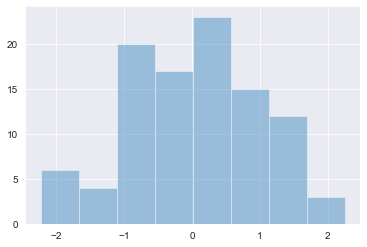

In [41]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False);

In order to make any prediction we need to fit a linear regression model, so we made sure the distribution of the variables is almost linear. 

Now to check the linearity of the variables we check for any skewness in the distribution and outliers in the data.

The variables we check for were 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'Neighborhood' and the target variable 'SalePrice'.

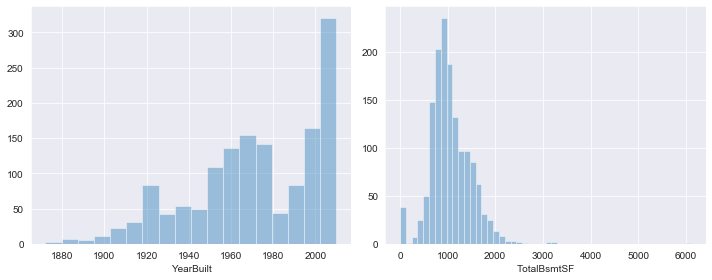

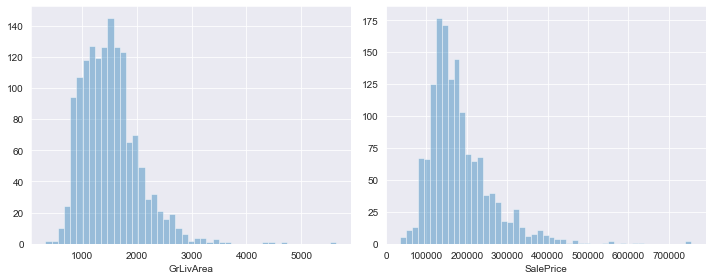

In [43]:
# Histograms
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataframe[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(dataframe[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[num_cols[i]], kde=False)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### The Kernel Density Estimation
***
The kernel density estimate may be less familiar, but it can be a useful tool for plotting the shape of a distribution.

Like the histogram, the KDE plot encodes the density of observations on one axis with height along the other axis:

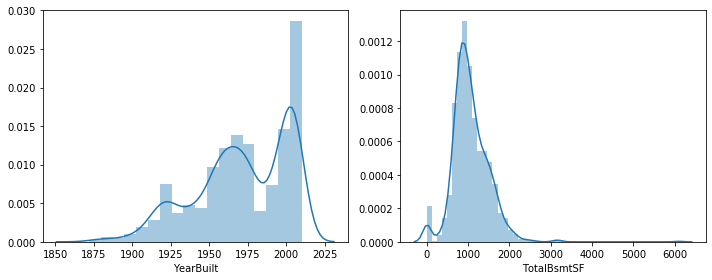

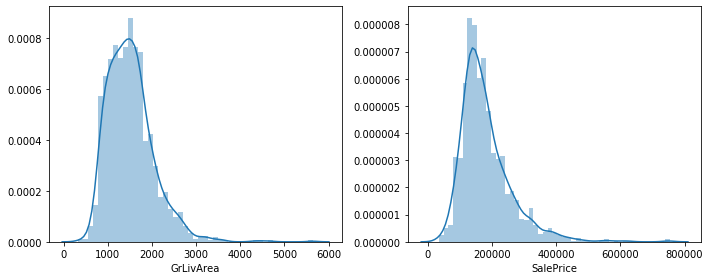

In [14]:
# Histograms

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(dataframe[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(dataframe[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[num_cols[i]], hist=True, kde=True)

We can observe that all of the histograms are left or right skewed, hence a transformation is required to make them linear.


<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Boxplots
***
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

Using this we can find the features which can be removed.

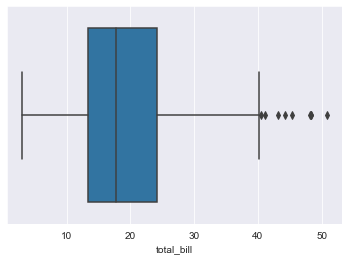

In [47]:
import seaborn as sns
sns.set_style("darkgrid")
tips = sns.load_dataset("tips")
sns.boxplot(x=tips["total_bill"])

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### More About Boxplots (1/2)
***
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary: 
* Minimum
* First quartile
* Median
* Third quartile
* Maximum. 

In the simplest box plot the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). 

A segment inside the rectangle shows the median and "whiskers" above and below the box show the locations of the minimum and maximum.

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### More About Boxplots (2/2)
***

![](./images/boxplot.png)

**Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.

**Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.

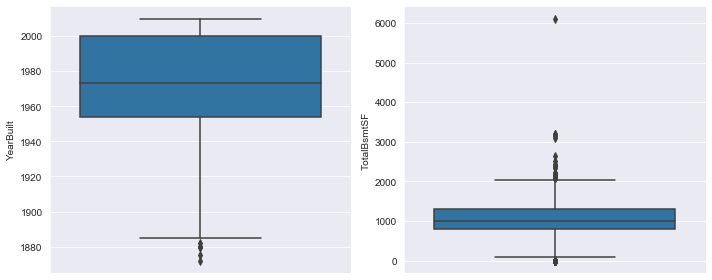

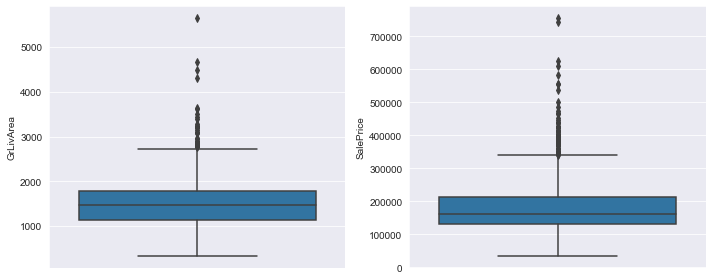

In [16]:
# BoxPlots

num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = dataframe)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = dataframe)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = dataframe)

## Categorical Features in Univariate Variables

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

### Countplots
***
    Most of the buildings are built post 1960 and most houses have an area in the range 1-2k sq feet. There are quite a few outliers in the sale price and living area and these might be correlated. We need to check the distribution of the categorical columns.

We can use Countplots for this which does nothing but shows the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. 

We chose the following columns from the above categorical_features_columns :
* Neighborhood
* SaleCondition
* BldgType

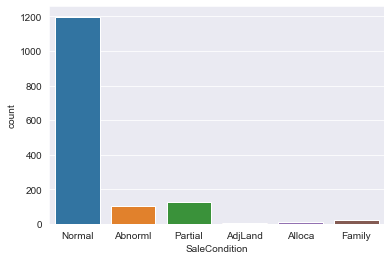

In [17]:
sns.countplot('SaleCondition', data=dataframe)

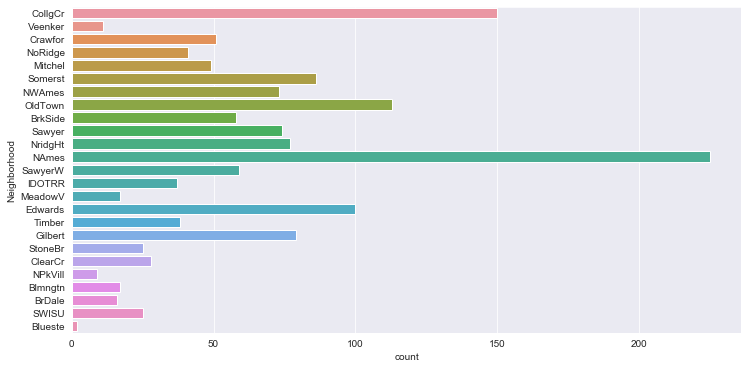

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(y='Neighborhood', data=dataframe)

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## What is Multivariate Analysis?
***
What if two or more variables are related? This would surely help derive further insight on the houses! 

In Multivariate analysis we try to find the relations between multiple variables. Obviously, in real life problems variables can be any combination of numeric or categorical variables.
The combinations are:
* Numeric vs Numeric
* Numeric vs Categorical
* Categorical vs Categorical

Another aspect of variable combination we look at is:
* Feature vs Feature
* Feature vs Target

## Numeric vs Numeric

For these kind of plots we use a scatterplot of the two variables. Although one can use a variety of plots in seaborn to do a quick and dirty EDA to some sophisticated plots. lmplot is one of the plots to do a scatterplot in seaborn, it'll by default fit a regression line on top which you can control using 'fit_reg' argument.
 
Now we will plot some important feature against our target.

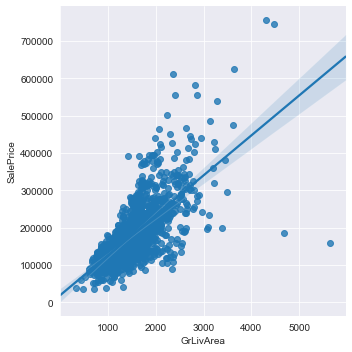

In [19]:
sns.lmplot('GrLivArea', 'SalePrice', data=dataframe, fit_reg=True)

* Using a scatterplot we can also detect *Multivariate outliers*, in this case there are two houses which have an area above ~4500 and they don't follow the trend. Removing these would give a better fit.

Another plot that we can use is a jointplot which gives a plethora of information in a single plot. It has:
* Scatter Plot
* Regression line fit to the data.
* Histogram and kde of individual variables.
* Pearson correlation and p value.

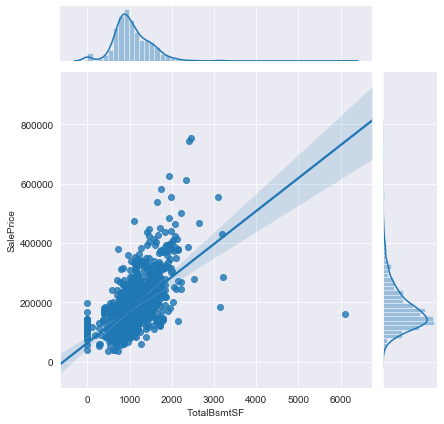

In [20]:
sns.jointplot('TotalBsmtSF', 'SalePrice', data=dataframe, kind='reg')

<div class="alert alert-block alert-success">**Another plot one can use is a hexplot which plots two numeric variables. Darker colors signify more points.**</div>

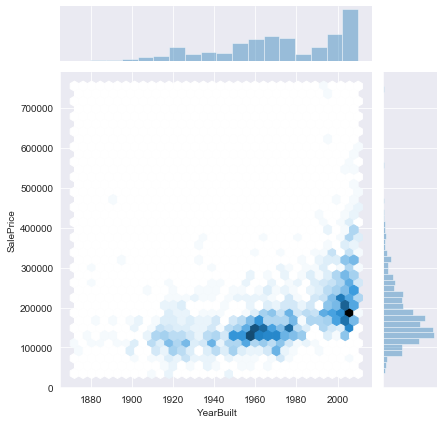

In [21]:
sns.jointplot('YearBuilt', 'SalePrice', data=dataframe, kind='hex')

Since we are going to use linear regression for modelling, its necessary to remove correlated variables to improve our model. We must find correlations using pandas 'corr' function and can visualize the correlation matrix using a heatmap in seaborn.

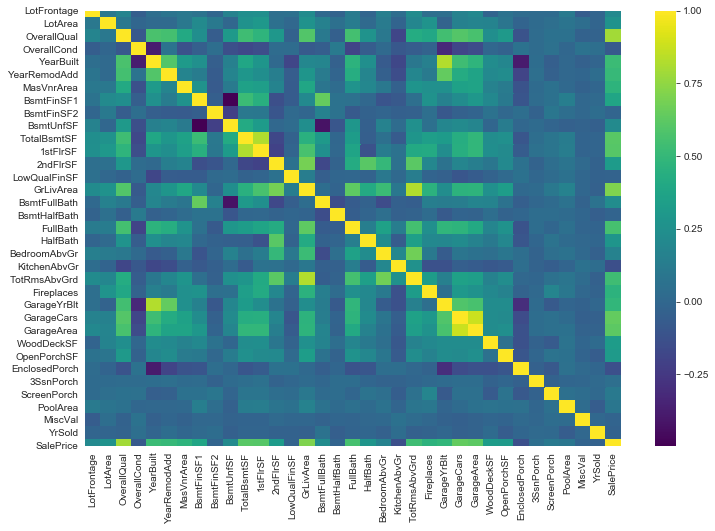

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(), cmap='viridis')

We can see the following inferences from above -
- A lot of variables are correlated to SalePrice which is good. 
- GrLivArea is highly correlated with TotRmsAbvGrd.
- Also Year the garage was built(GarageYrBlt) is correlated with the year the building was built(YearBuilt). 

**It's a good idea to remove such correlated variables during feature selection.**

<div class="alert alert-block alert-success">**Now we plot some top variables to see the relations between them. We starts by filtering top 10 variables which are highly correlated with SalePrice.**</div>

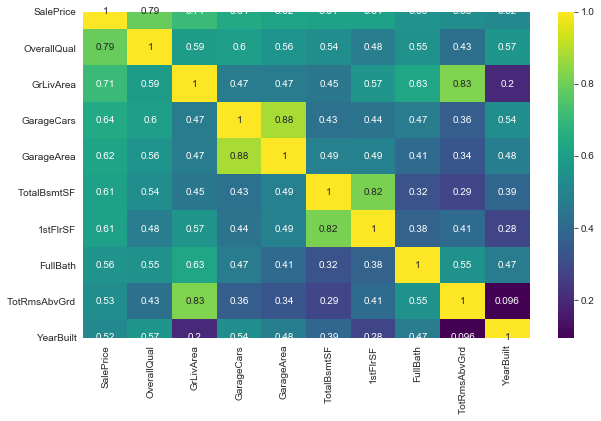

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = dataframe.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = dataframe[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also correlated variables. However no. of cars that can fit into a garage is dependent on the garage area and one can remove one of these. Check the correlation between them
- TotalBsmtSF and 1stFlrSF are also highy correlated. We can drop one of these.
- As pointed out above Yearbuilt and TotRmsAbvGrd are highly correlated, we'll discard TotRmsAbvGrd.

<div class="alert alert-block alert-success">**An easy way to plot all possible interactions is between a set of numeric variables is using pairplot function in seaborn.**</div>

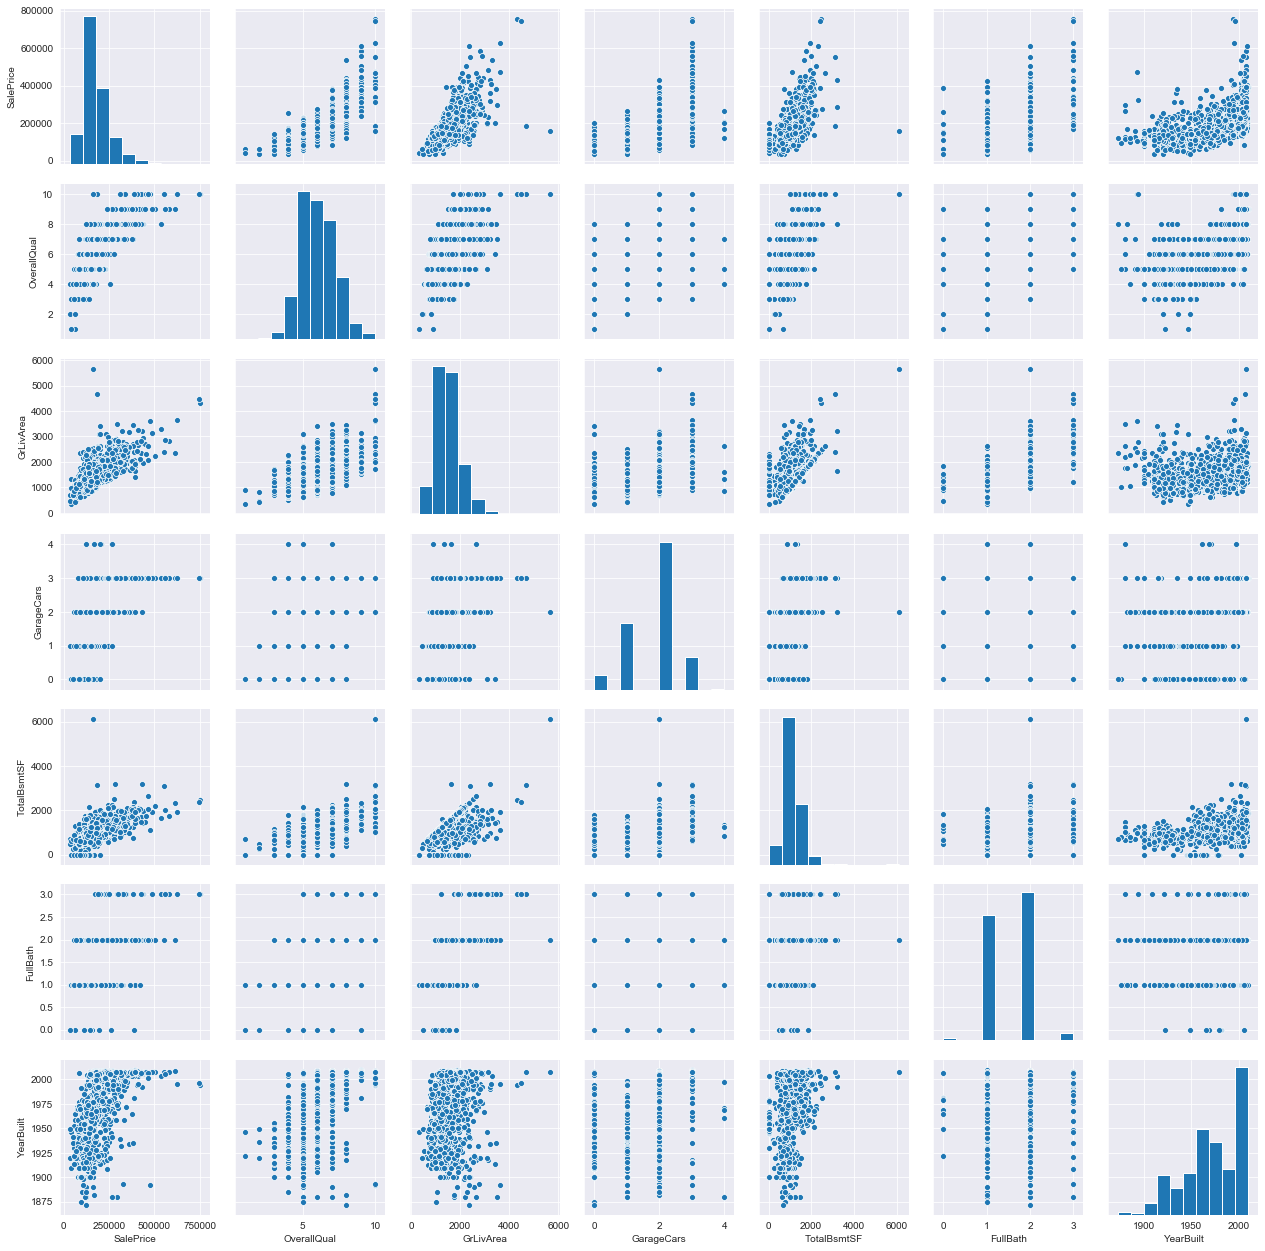

In [24]:
# Visualizing relations between all major variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dataframe[cols])

We notice a few interesting things here, in the scatter plot of TotalBsmtSF and GrLivArea, there is a line below which most TotalBsmtSF values fall in which makes sense as the area of Basement usually is lesser than living area. Also there is an exponential increase in SalePrice vs Yearbuilt in the recent past.

## Numeric vs Categorical

To plot these relations we can use boxplots and swarmplots. We can create these using boxplot function in seaborn. We create a boxplot for numerical variables grouped by categories in categorical variable.

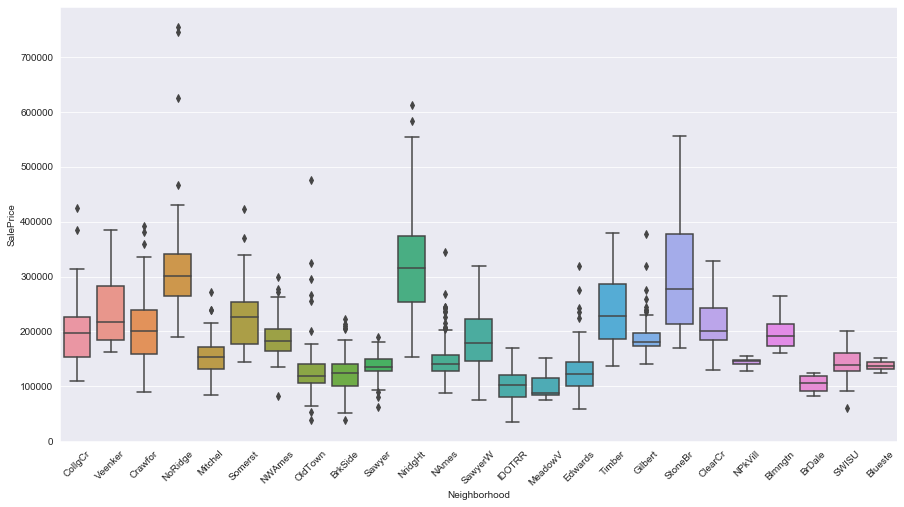

In [25]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=dataframe)

* We conclude that the distribution of SalePrice changes with the individual neighborhoods and can be a good predictor for it.
* Next we take a look at swarmplots which are similar to boxplots, but they also show no. of points at each value of numerical variable. A denser plot signifies more observations in it.

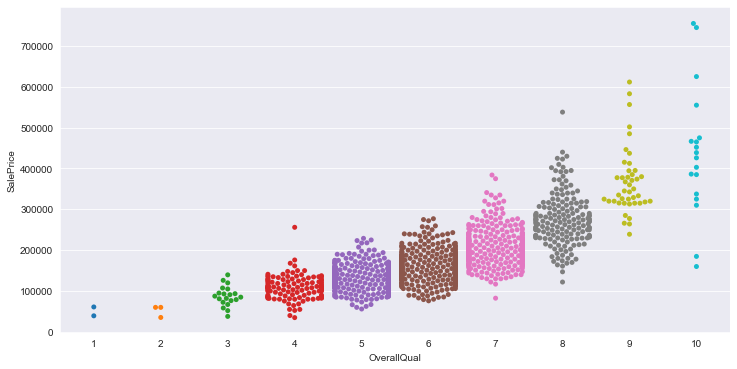

In [26]:
plt.figure(figsize=(12,6))
sns.swarmplot('OverallQual', 'SalePrice', data=dataframe)

<div class="alert alert-block alert-success">Here we can see that there's a marked increase in saleprice as the overall quality increases. So using this variable is a good idea to predict SalePrice.</div>

## Categorical vs Categorical

This can be done using using crosstab or graphically using a stacked barplot. We consider two variables 'Neighborhood' and 'OverallQual' and check the relation between them using both of these.

In [27]:
crosstab = pd.crosstab(index=dataframe["Neighborhood"], columns=dataframe["OverallQual"])
crosstab

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


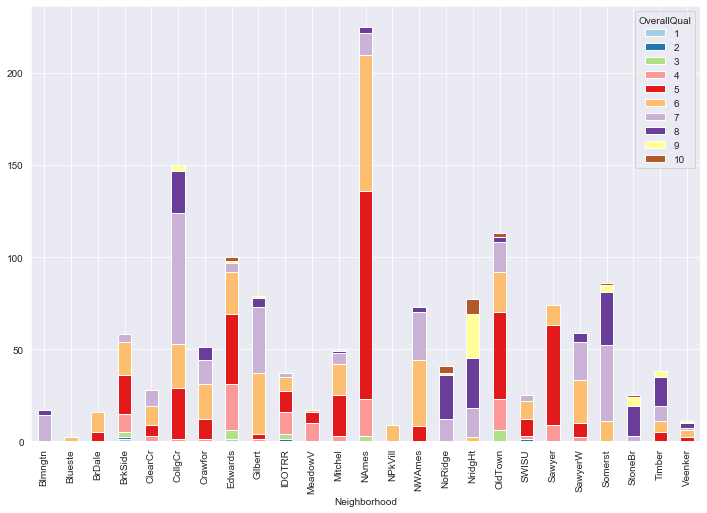

In [28]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

# In-session Recap Time
***
- Initial Exploration
    - Numerical and Categorical Variables
- Univariate Analysis
    - Numerical Feature
    - Histogram
    - Kernel Density Estimation
    - Boxplot
- Multi-variate Analysis
    - Numeric vs Numeric
    - Numeric vs Categorical
    - Categorical vs Categorical

In [48]:
#Loading the Automobile data for the mini challenge
#Target variable is the price of the car
df = pd.read_csv('../data/Automobile_data.csv')
df.head()

,symboling,make,fuel-type,body-style,drive-wheels,wheel-base,length,width,height,horsepower,peak-rpm,highway-mpg,city-mpg,price
0,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,13495
1,3,alfa-romero,gas,convertible,rwd,88.6,168.8,64.1,48.8,111,5000,27,21,16500
2,1,alfa-romero,gas,hatchback,rwd,94.5,171.2,65.5,52.4,154,5000,26,19,16500
3,2,audi,gas,sedan,fwd,99.8,176.6,66.2,54.3,102,5500,30,24,13950
4,2,audi,gas,sedan,4wd,99.4,176.6,66.4,54.3,115,5500,22,18,17450


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
Get an overview of your data by using info() and describe() functions of pandas.

In [51]:
print(df.info())
print()
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
symboling       205 non-null int64
make            205 non-null object
fuel-type       205 non-null object
body-style      205 non-null object
drive-wheels    205 non-null object
wheel-base      205 non-null float64
length          205 non-null float64
width           205 non-null float64
height          205 non-null float64
horsepower      205 non-null int64
peak-rpm        205 non-null int64
highway-mpg     205 non-null int64
city-mpg        205 non-null int64
price           205 non-null int64
dtypes: float64(4), int64(6), object(4)
memory usage: 22.5+ KB
None


        symboling  wheel-base      length       width      height  horsepower  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878  104.936585   
std      1.245307    6.021776   12.337289    2.145204    2.443522   40.609702   

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
Plot a histogram showing the distribution of the car prices (target variable).

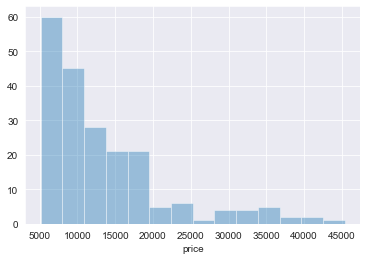

In [54]:
import seaborn as sns

sns.distplot(df['price'], hist=True, kde=False)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
Plot a countplot of the 'make' column of the dataset which represents the different car makers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

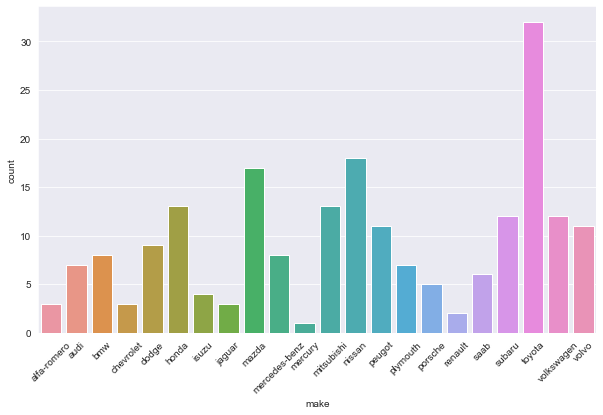

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(df['make'])
plt.xticks(rotation=45)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
Plot a jointplot that shows the relationship between the 'horsepower' and 'price' of the car.

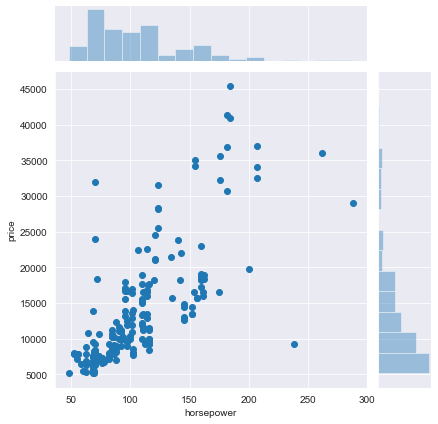

In [62]:
sns.jointplot(df['horsepower'],df['price'])

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
Plot the correlation heatmap of the data.

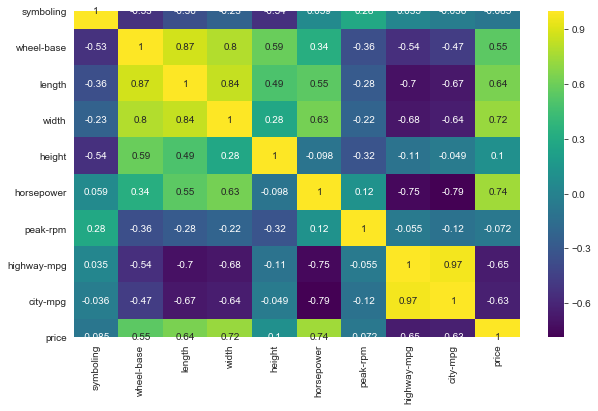

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), annot=True, cmap='viridis')


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
Plot a boxplot that shows the variability of each 'body-style' with respect to the 'price'.

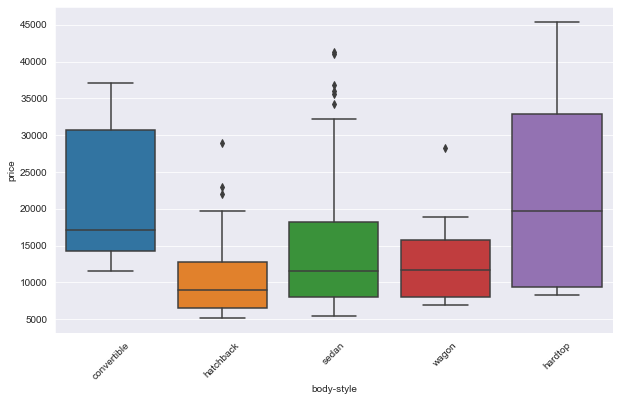

In [67]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.boxplot('body-style', 'price', data=df)

# Thank You
***
### Next Session: Overcoming Problems with Linear Regression (Overfitting/ Outliers/ Regularization)
For more queries - Reach out to academics@greyatom.com 